In [57]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import six

In [ ]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [113]:
models = ['ST4000DM000', 'ST31500541AS', 'Hitachi HDS722020ALA330', 'Hitachi HDS5C3030ALA630']
model_list = []
for model_name in models:
    df = pd.read_csv('./preprocess/' + model_name +'_finalstatics.csv').rename({'Unnamed: 0': 'Metrics'}, axis='columns')
    df['model'] = model_name
    model_list.append(df)
df = pd.concat(model_list, axis=0)
df.set_index(['model', 'Metrics']).round(2)

GBDT   SVM    DT    LR    RF   RGF
model                   Metrics                                    
ST4000DM000             P        0.99  0.98  0.92  0.60  0.99  0.99
                        R        0.95  0.96  0.87  0.61  0.95  0.94
                        F        0.97  0.97  0.89  0.60  0.97  0.97
                        Sd       0.02  0.01  0.03  0.30  0.02  0.02
ST31500541AS            P        1.00  1.00  0.90  0.34  1.00  1.00
                        R        0.92  0.92  0.76  0.97  0.92  0.92
                        F        0.96  0.96  0.82  0.50  0.96  0.96
                        Sd       0.01  0.01  0.07  0.02  0.01  0.01
Hitachi HDS722020ALA330 P        0.99  0.93  0.89  0.71  0.99  0.99
                        R        0.86  0.87  0.86  0.85  0.85  0.85
                        F        0.92  0.89  0.86  0.77  0.91  0.91
                        Sd       0.04  0.07  0.09  0.08  0.04  0.04
Hitachi HDS5C3030ALA630 P        1.00  0.97  0.63  0.46  1.00  1.00
                        R        0.71  0.71  0.74  0.56  0.71  0.69
                        F        0.83  0.82  0.67  0.50  0.83  0.81
                        Sd       0.06  0.07  0.05  0.05  0.06  0.04

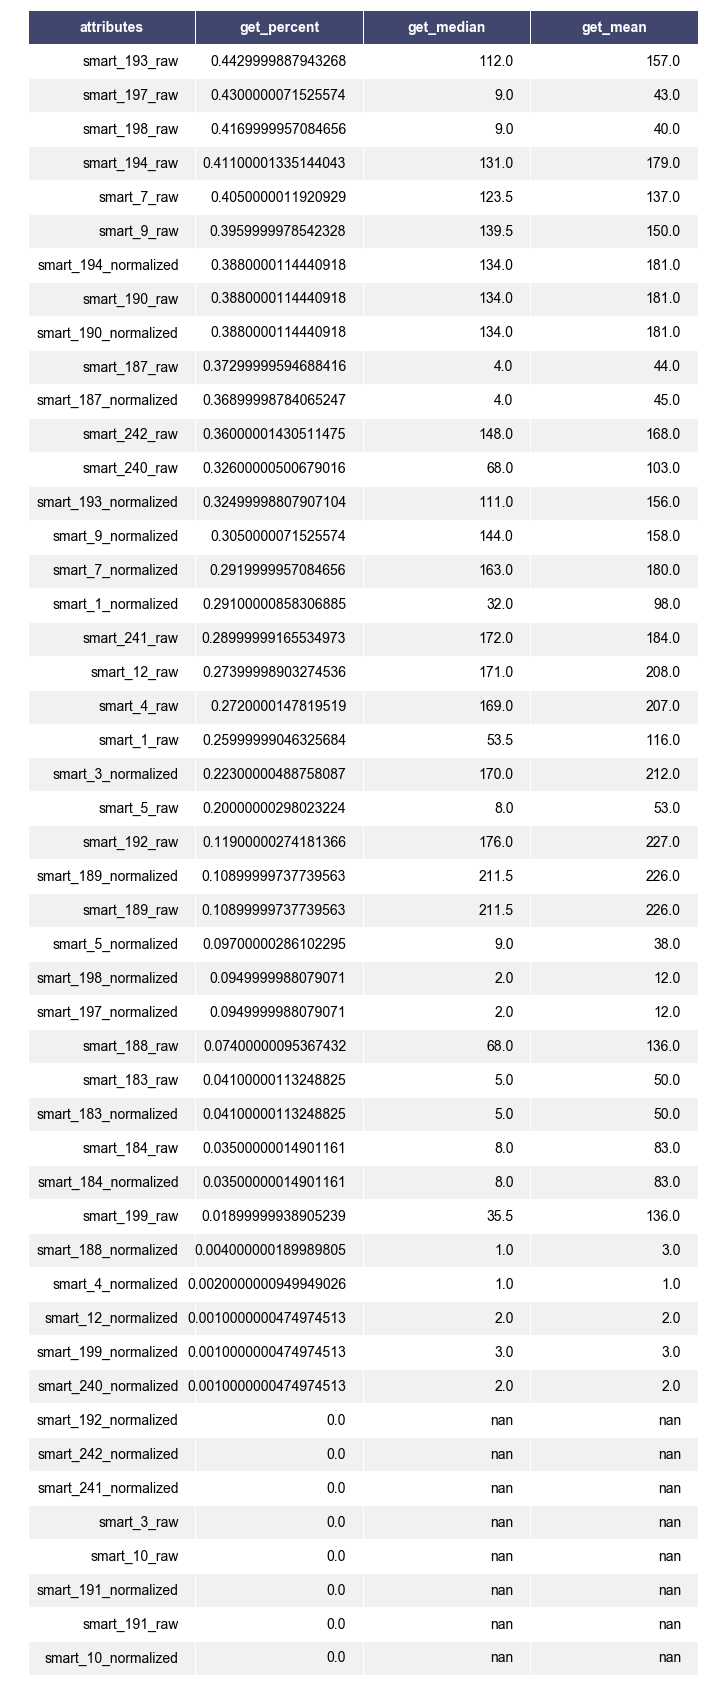

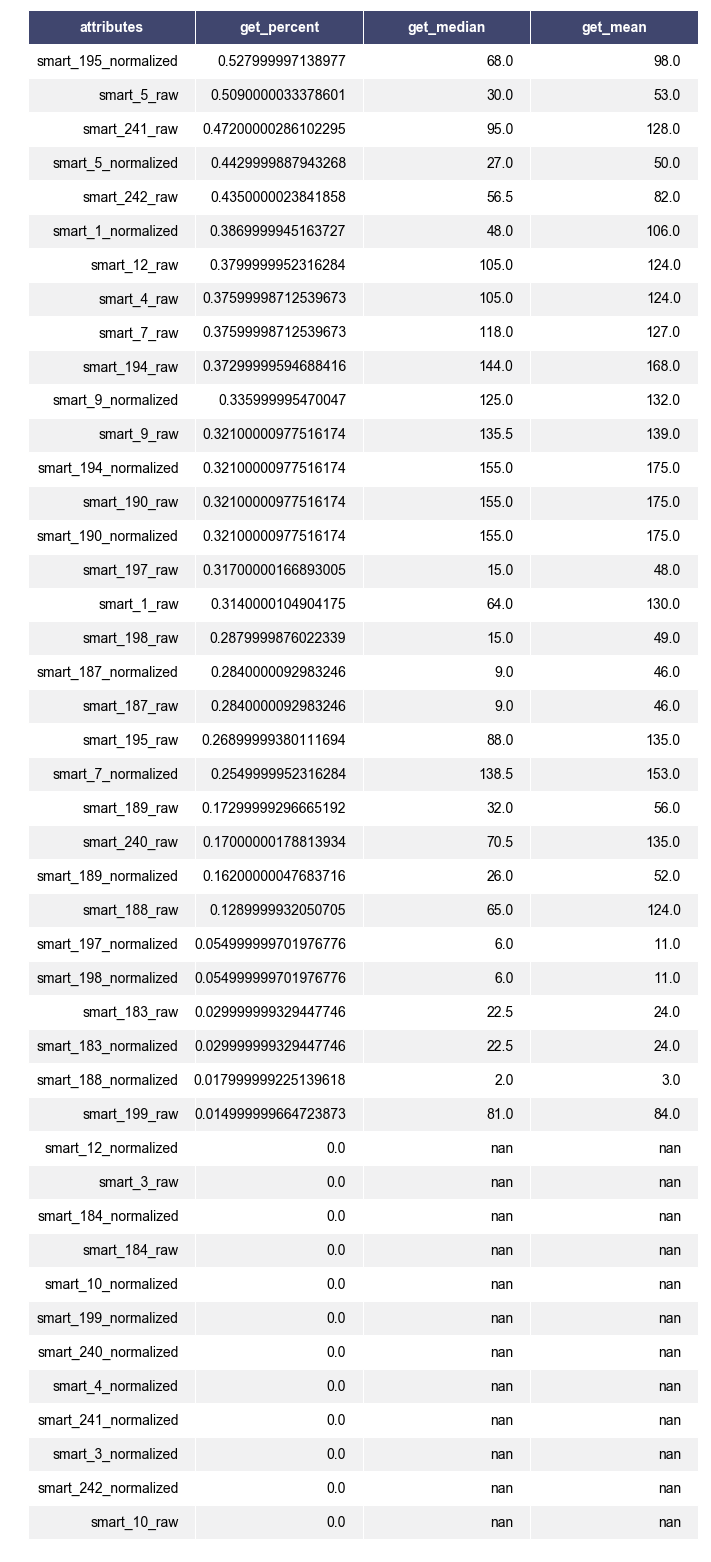

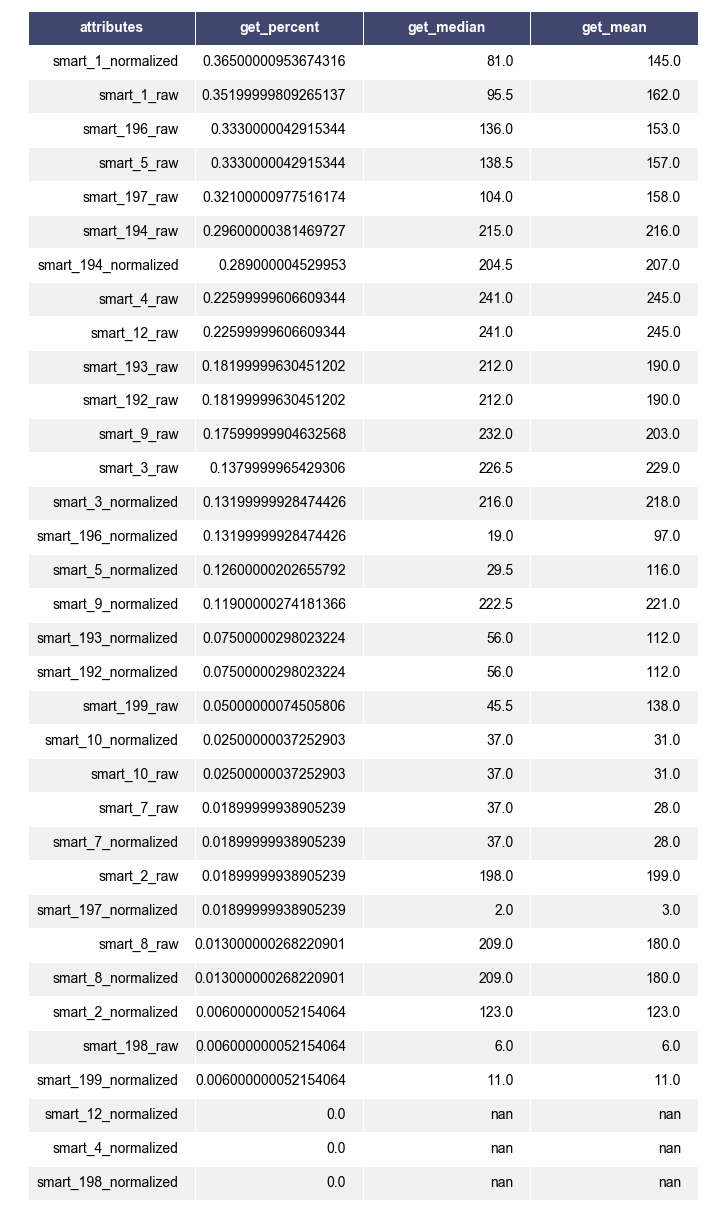

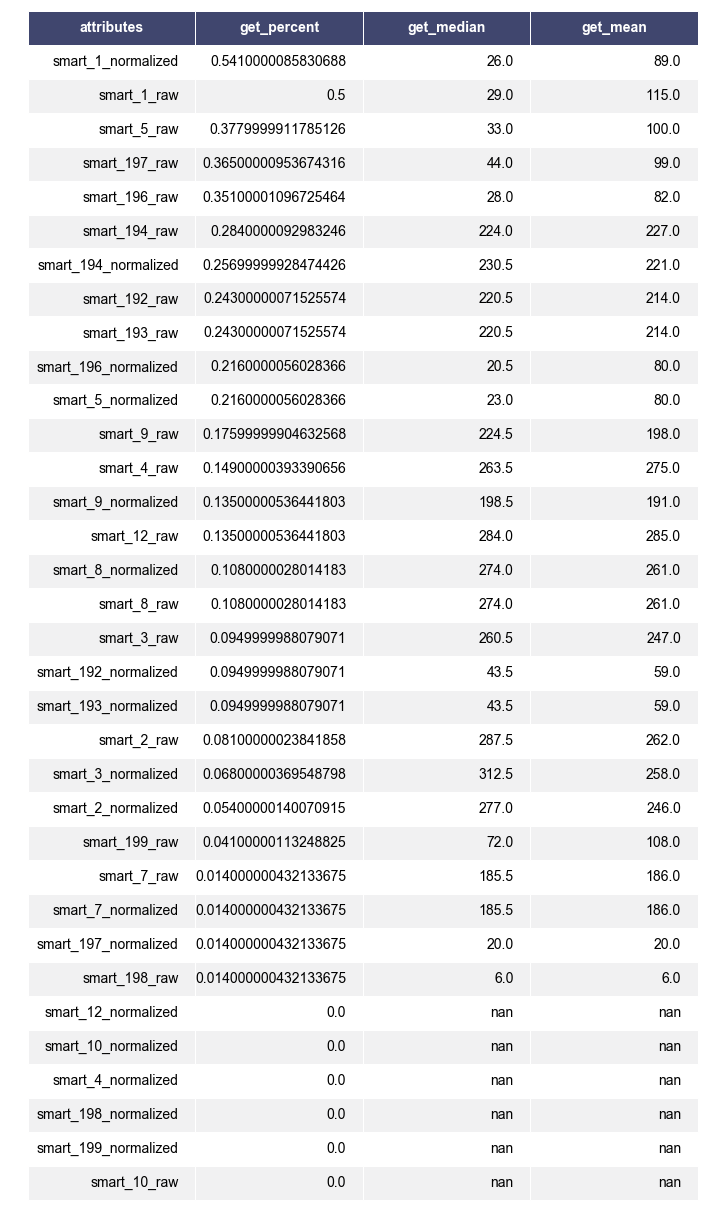

In [112]:
for model_name in models: 
    summarize = pd.read_csv('./preprocess/' + model_name + "_summarize.csv").T
    summarize = summarize.iloc[1:, :].rename({0: 'get_percent', 1: 'get_median', 2: 'get_mean'}, axis='columns').sort_values(by='get_percent', ascending=False)
    summarize.index.name = 'Attributes'
    summarize = summarize.astype(np.float32).round({'get_percent': 3, 'get_mean': 0, 'get_mean': 0})
    df = summarize.copy().astype(np.float32)
    df.insert(0, 'attributes', df.index)
    figure = render_mpl_table(df, header_columns=0, col_width=3.0)
    figure.get_figure().savefig('./images/' + model_name + '_summarize.png')

In [134]:
df = pd.DataFrame(columns=['# total', '# failure', '# failure percentage'], index=models)

for model_name in models: 
    compacted_info = pd.read_csv('./preprocess/' + model_name + '_compacted.csv')
    df.loc[model_name]['# total'] = compacted_info['serial_number'].unique().size
    df.loc[model_name]['# failure'] = compacted_info.loc[compacted_info['failure'] == 1]['serial_number'].unique().size
    df.loc[model_name]['# failure percentage'] = np.round(df.loc[model_name]['# failure'] / df.loc[model_name]['# total'], decimals=2)
df

,# total,# failure,# failure percentage
ST4000DM000,29908,824,0.03
ST31500541AS,1970,271,0.14
Hitachi HDS722020ALA330,4737,159,0.03
Hitachi HDS5C3030ALA630,4634,74,0.02
